1.Problem Statement

2.Importing  Libraries

3.Loading Dataset

4.Data Cleaning & Data Preprocessing

5.Exploratory Data Analysis

  1.**Univarient**
  
    1.How many matches were played each season?
    
    2.How many teams played each season?
    
    3.How many matches played in each venue?
    
    4.How many matches plaed in each city?
    
    5.Top 10 player with most MoM
    
    6.Do team bat first or bowl first after winning first?
    
    7.Do team win by batting first or bowling first?
    
  2.**Bivarient/Multivarient:**
  
  
    1.Which team has dominated ipl so far?
    
    2.Which team has more chance of winning match by winning toss?
    
    3.Which team has high winning percentage?
    
    4.Top 10 Batsman
    
    5.Top 10 Bowlers
    
    6.Top 10 Run Scores
    
    7.Top 10 Bowlers who has bowled more extras
    
    8.Percentagae of wicket falling based on each over
    
    9.Percentage of runs scored based on each over
    

# Problem Statement



This is IPL's data containing 2 datasets - one gives details about the venues and match details while the other provides
ball-by-ball record over 13 years of the IPL match (2008-2020). Here we are trying to get an descriptive analysis of IPL in terms of teams, venues, toss decisions, winners and individual batsmen and bowlers .


In [97]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings   
warnings.filterwarnings('ignore')

In this notebook we have two dataset 

1.Match dataset whcih contain information about the venue,city,team names, toss decision ,toss winner,result,upmier's for ipl matches happened from 2008 to 2020
    
2.Ball by ball dataset contains imformation about ball by ball for matches from 2008 to 2020 with total runs scored by each batsman, wickets taken by each bowler and extras provided in each match


In [2]:
match=pd.read_csv("IPL Matches 2008-2020.csv")
ball=pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")

In [3]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

There are **816 rows and 17 columns** in our match dataset in which **3 numeric datatype and 14 object datatype**

Values are missing in **city,player_of_match,result_margin,methods**

In [4]:
ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

There are **193468 rows and 18 columns** in our ball by ball  dataset
There are **9 columns as numeric datatype and 9 columns as object datatype** 

There are **missing fields in       dismissal_kind,player_dismissed,fielder,extras_type,bowling_team** 

In [5]:
#merging two data

merge_data=pd.merge(left=match,right=ball,on="id")
#since id is a unique column we can consider it as a index
merge_data.set_index("id",inplace=True)


In [6]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193468 entries, 335982 to 1237181
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   city              190329 non-null  object 
 1   date              193468 non-null  object 
 2   player_of_match   193096 non-null  object 
 3   venue             193468 non-null  object 
 4   neutral_venue     193468 non-null  int64  
 5   team1             193468 non-null  object 
 6   team2             193468 non-null  object 
 7   toss_winner       193468 non-null  object 
 8   toss_decision     193468 non-null  object 
 9   winner            193096 non-null  object 
 10  result            193096 non-null  object 
 11  result_margin     189871 non-null  float64
 12  eliminator        193096 non-null  object 
 13  method            3208 non-null    object 
 14  umpire1           193468 non-null  object 
 15  umpire2           193468 non-null  object 
 16  inning        

After merging the dataset we have **193468 rows and 33 columns**
There are **10 columns as nunmeric datatype and 23 columns as object datatype**

In [7]:
merge_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
city,190329,32,Mumbai,24296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,193468,596,2012-05-05,506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_of_match,193096,233,AB de Villiers,5663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
venue,193468,36,Eden Gardens,17988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neutral_venue,193468.0,NaN,NaN,NaN,0.094827,0.292977,0.0,0.0,0.0,0.0,1.0
team1,193468,15,Royal Challengers Bangalore,25238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team2,193468,15,Mumbai Indians,25584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toss_winner,193468,15,Mumbai Indians,25404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toss_decision,193468,2,field,117127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
winner,193096,15,Mumbai Indians,28885,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# DataCleaning & DataPreprocessing

In [5]:
match.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

From Pre profiling, we found that:

**City  has 13 missing Fields**

**Player_of_match,winner,result,eliminator has 4 missing fields**

**method has 797 missing fields**

In [6]:
match[match["city"].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,NaN,Aleem Dar,S Ravi
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,NaN,BF Bowden,M Erasmus
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,N,NaN,M Erasmus,S Ravi
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,N,NaN,M Erasmus,S Ravi
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,N,NaN,BF Bowden,M Erasmus
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni


we can see that matches happened in **Dubai an Sharjah** city's values are missing
so for those city we can replace them with **Dubai and Sharjah**

In [19]:
match.city=match.city.fillna(match[match["city"].isnull()]["venue"].apply(lambda x: x.split()[0]))

In [10]:
match[match["winner"].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


From above we can see there were no result , maybe it's because of rain so
missing value for winner,result,eliminator and player_of_match is missing  makes sence

So we can fill the missing value as no result's

In [10]:
match.winner=match.winner.fillna("NO_Result")
match.result=match.result.fillna("NO_Result")
match.player_of_match=match.player_of_match.fillna("None")

In [13]:
match[match["result_margin"].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,NaN,MR Benson,M Erasmus
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,NaN,K Hariharan,DJ Harper
241,501265,Delhi,2011-05-21,None,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NO_Result,NO_Result,NaN,NaN,NaN,SS Hazare,RJ Tucker
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,NaN,AK Chaudhary,S Ravi
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary
476,829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,Y,NaN,M Erasmus,S Ravi
486,829763,Bangalore,2015-04-29,None,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NO_Result,NO_Result,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,None,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NO_Result,NO_Result,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
610,1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney


Data in result margin is miisng for **matches tied and no result**

In [14]:
match.loc[[241,486,511,744],:].result_margin.replace({np.nan:"NO_Result"},inplace=True)


In [19]:
 ball[(ball["id"]==392190) & (ball["over"] >=19)]

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
15170,392190,1,19,5,AS Raut,SK Warne,Anureet Singh,6,0,6,0,0,NaN,NaN,NaN,NaN,Rajasthan Royals,Kolkata Knight Riders
15171,392190,1,19,6,AS Raut,SK Warne,Anureet Singh,2,0,2,0,0,NaN,NaN,NaN,NaN,Rajasthan Royals,Kolkata Knight Riders
15234,392190,1,19,1,AS Raut,SK Warne,Anureet Singh,4,0,4,0,0,NaN,NaN,NaN,NaN,Rajasthan Royals,Kolkata Knight Riders
15235,392190,1,19,2,AS Raut,SK Warne,Anureet Singh,0,0,0,0,0,NaN,NaN,NaN,NaN,Rajasthan Royals,Kolkata Knight Riders
15236,392190,1,19,3,AS Raut,SK Warne,Anureet Singh,0,0,0,0,0,NaN,NaN,NaN,NaN,Rajasthan Royals,Kolkata Knight Riders
15237,392190,1,19,4,AS Raut,SK Warne,Anureet Singh,6,0,6,0,0,NaN,NaN,NaN,NaN,Rajasthan Royals,Kolkata Knight Riders
15365,392190,2,19,1,SC Ganguly,AB Agarkar,Kamran Khan,0,1,1,0,0,NaN,NaN,NaN,wides,Kolkata Knight Riders,Rajasthan Royals
15366,392190,2,19,2,SC Ganguly,AB Agarkar,Kamran Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Rajasthan Royals
15367,392190,2,19,3,AB Agarkar,SC Ganguly,Kamran Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Rajasthan Royals
15368,392190,2,19,4,SC Ganguly,AB Agarkar,Kamran Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Rajasthan Royals


**since we don't have any information about super over we can change those values as tie**

In [16]:
match.result_margin=match.result_margin.fillna(match.apply(lambda x:"tie" if x["result"]=="tie" else "No_Result",axis=1))

In [17]:
match.drop(["method","umpire1","umpire2","eliminator","neutral_venue"],axis=1,inplace=True)

In [20]:
match.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
dtype: int64

**From above we can see there are no missing values from match data**

In [ ]:
Checking an

In [21]:
match["city"].unique()
#city bangalore are written as banglore and bengaluru 

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru'],
      dtype=object)

In [22]:
match["city"].replace("Bengaluru","Bangalore",inplace=True)

In [25]:
match["venue"].unique()
# M Chinnaswamy Stadium &  Punjab Cricket Association IS Bindra Stadium, Mohali  
#are reprecented in two different way


array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [29]:
match["venue"].replace({"M.Chinnaswamy Stadium":"M Chinnaswamy Stadium",
                      'Punjab Cricket Association IS Bindra Stadium, Mohali': 
                       'Punjab Cricket Association Stadium, Mohali'},inplace=True)

In [30]:
match["team1"].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala',
       'Rising Pune Supergiant', 'Sunrisers Hyderabad', 'Gujarat Lions'],
      dtype=object)

In [31]:
teams={"Pune Warriors":"Rising Pune Supergiant",
                       "Rising Pune Supergiants":"Rising Pune Supergiant",
                       'Delhi Daredevils':'Delhi Capitals',
                       }
match["team1"].replace(teams,inplace=True)
match["team2"].replace(teams,inplace=True)
match["winner"].replace(teams,inplace=True)
match["toss_winner"].replace(teams,inplace=True)

In [51]:
match["date"]=pd.to_datetime(match["date"])
#SInce dattime is in string we are changing it to datetime

In [23]:
ball.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [24]:
ball[ball["dismissal_kind"].notnull()]

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
32,335982,1,12,1,RT Ponting,BB McCullum,JH Kallis,0,0,0,0,1,caught,RT Ponting,P Kumar,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
64,335982,1,17,1,DJ Hussey,BB McCullum,AA Noffke,0,0,0,0,1,caught,DJ Hussey,CL White,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
112,335982,1,5,2,SC Ganguly,BB McCullum,Z Khan,0,0,0,0,1,caught,SC Ganguly,JH Kallis,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
132,335982,2,7,5,MV Boucher,CL White,SC Ganguly,0,0,0,0,1,caught,MV Boucher,M Kartik,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
135,335982,2,8,2,B Akhil,CL White,AB Agarkar,0,0,0,0,1,caught,B Akhil,RT Ponting,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193381,1237181,1,19,2,AR Patel,SS Iyer,NM Coulter-Nile,0,0,0,0,1,caught,AR Patel,AS Roy (sub),NaN,Delhi Capitals,Mumbai Indians
193385,1237181,1,19,6,SS Iyer,K Rabada,NM Coulter-Nile,1,0,1,0,1,run out,K Rabada,NaN,NaN,Delhi Capitals,Mumbai Indians
193386,1237181,1,0,1,MP Stoinis,S Dhawan,TA Boult,0,0,0,0,1,caught,MP Stoinis,Q de Kock,NaN,Delhi Capitals,Mumbai Indians
193401,1237181,1,2,4,AM Rahane,S Dhawan,TA Boult,0,0,0,0,1,caught,AM Rahane,Q de Kock,NaN,Delhi Capitals,Mumbai Indians


In [25]:
ball[ball["dismissal_kind"]=="run out"]

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
155,335982,2,11,1,AA Noffke,P Kumar,SC Ganguly,1,0,1,0,1,run out,AA Noffke,"AB Agarkar,WP Saha",NaN,Royal Challengers Bangalore,Kolkata Knight Riders
575,335984,1,3,5,YK Pathan,SR Watson,B Geeves,0,0,0,0,1,run out,YK Pathan,NaN,NaN,Rajasthan Royals,Delhi Daredevils
590,335984,1,6,2,SR Watson,M Kaif,R Bhatia,1,0,1,0,1,run out,SR Watson,NaN,NaN,Rajasthan Royals,Delhi Daredevils
724,335985,1,5,4,ST Jayasuriya,RV Uthappa,Z Khan,0,0,0,0,1,run out,ST Jayasuriya,Z Khan,NaN,Mumbai Indians,Royal Challengers Bangalore
1011,335986,1,18,4,RP Singh,PP Ojha,M Kartik,0,0,0,0,1,run out,PP Ojha,"Mohammad Hafeez,WP Saha",NaN,Deccan Chargers,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191793,1216545,1,19,2,Mohammad Nabi,WP Saha,AD Russell,1,0,1,0,1,run out,WP Saha,NaN,NaN,Sunrisers Hyderabad,Kolkata Knight Riders
192152,1216546,2,5,5,N Pooran,MA Agarwal,R Ashwin,0,0,0,0,1,run out,MA Agarwal,NaN,NaN,Kings XI Punjab,Delhi Capitals
192834,1237178,1,10,6,MM Ali,AB de Villiers,S Nadeem,0,0,0,0,1,run out,MM Ali,NaN,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad
193329,1237181,2,10,5,RG Sharma,SA Yadav,R Ashwin,0,0,0,0,1,run out,SA Yadav,NaN,NaN,Mumbai Indians,Delhi Capitals


**We can able to observe players who are not out in that particular ball's data are missisng**



In [32]:
ball.dismissal_kind=ball.dismissal_kind.fillna("Not Out")
ball.player_dismissed=ball.player_dismissed.fillna("None")
ball.extras_type=ball.extras_type.fillna("Correct Ball")

In [33]:
ball[ball["bowling_team"].isnull()]["id"].unique()

array([501265, 829763])

In [34]:
print(match[match["id"]==501265][["team1","team2"]])
print(match[match["id"]==829763][["team1","team2"]])

              team1                   team2
241  Delhi Capitals  Rising Pune Supergiant
                           team1             team2
486  Royal Challengers Bangalore  Rajasthan Royals


**Bolwing teams are missing for abandoned matches**

In [35]:

ball.bowling_team=ball.bowling_team.fillna(lambda x:match[match["id"]==x["id"]]["team2"])

In [36]:
ball.fielder=ball.apply(lambda x: "None" if x["dismissal_kind"]in["Not Out","bowled","lbw","caught and bowled","retired hurt","hit wicket",'obstructing the field'] else x["fielder"] , axis=1)

In [37]:
ball[ball["fielder"].isnull()]

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
575,335984,1,3,5,YK Pathan,SR Watson,B Geeves,0,0,0,0,1,run out,YK Pathan,NaN,Correct Ball,Rajasthan Royals,Delhi Daredevils
590,335984,1,6,2,SR Watson,M Kaif,R Bhatia,1,0,1,0,1,run out,SR Watson,NaN,Correct Ball,Rajasthan Royals,Delhi Daredevils
61567,548318,1,19,4,RR Bhatkal,DL Vettori,DE Bollinger,0,0,0,0,1,run out,DL Vettori,NaN,Correct Ball,Royal Challengers Bangalore,Chennai Super Kings
137625,1082595,1,16,4,Vishnu Vinod,KM Jadhav,Z Khan,0,0,0,0,1,run out,Vishnu Vinod,NaN,Correct Ball,Royal Challengers Bangalore,Delhi Daredevils
150749,1136562,1,14,6,R Tewatia,G Gambhir,AJ Tye,0,0,0,0,1,run out,G Gambhir,NaN,Correct Ball,Delhi Daredevils,Kings XI Punjab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191793,1216545,1,19,2,Mohammad Nabi,WP Saha,AD Russell,1,0,1,0,1,run out,WP Saha,NaN,Correct Ball,Sunrisers Hyderabad,Kolkata Knight Riders
192152,1216546,2,5,5,N Pooran,MA Agarwal,R Ashwin,0,0,0,0,1,run out,MA Agarwal,NaN,Correct Ball,Kings XI Punjab,Delhi Capitals
192834,1237178,1,10,6,MM Ali,AB de Villiers,S Nadeem,0,0,0,0,1,run out,MM Ali,NaN,Correct Ball,Royal Challengers Bangalore,Sunrisers Hyderabad
193329,1237181,2,10,5,RG Sharma,SA Yadav,R Ashwin,0,0,0,0,1,run out,SA Yadav,NaN,Correct Ball,Mumbai Indians,Delhi Capitals


In [38]:
ball[ball["dismissal_kind"]=="run out"]["fielder"].unique()

array(['AB Agarkar,WP Saha', nan, 'Z Khan', 'Mohammad Hafeez,WP Saha',
       'RA Jadeja,Kamran Akmal', 'MK Tiwary,KD Karthik', 'S Badrinath',
       'Harbhajan Singh', 'VVS Laxman,RP Singh', 'DJ Bravo,L Ronchi',
       'Harbhajan Singh,L Ronchi', 'B Lee', 'M Rawat,SR Watson',
       'Sohail Tanvir,M Rawat', 'MS Dhoni,Joginder Sharma',
       'V Sehwag,R Bhatia', 'DPMD Jayawardene,KC Sangakkara',
       'W Jaffer,MV Boucher', 'SK Raina,MS Dhoni',
       'Joginder Sharma,JDP Oram,MS Dhoni', 'AM Rahane,ST Jayasuriya',
       'LRPL Taylor', 'Yuvraj Singh,KC Sangakkara', 'SB Bangar',
       'SK Trivedi', 'RA Jadeja,M Rawat', 'Umar Gul,WP Saha',
       'PJ Sangwan', 'LPC Silva', 'R Vinay Kumar', 'SP Goswami',
       'AS Yadav', 'DB Das,DJ Hussey', 'DS Kulkarni', 'IK Pathan',
       'U Kaul', 'SE Marsh', 'V Sehwag', 'CL White',
       'DW Steyn,MV Boucher', 'BJ Hodge', 'M Kartik', 'SK Warne',
       'M Rawat,Sohail Tanvir', 'YV Takawale,CRD Fernando', 'HH Gibbs',
       'KD Karthik', 'MM Pat

In [39]:
ball[ball["fielder"].isnull()]
#these datas are not captured properly

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
575,335984,1,3,5,YK Pathan,SR Watson,B Geeves,0,0,0,0,1,run out,YK Pathan,NaN,Correct Ball,Rajasthan Royals,Delhi Daredevils
590,335984,1,6,2,SR Watson,M Kaif,R Bhatia,1,0,1,0,1,run out,SR Watson,NaN,Correct Ball,Rajasthan Royals,Delhi Daredevils
61567,548318,1,19,4,RR Bhatkal,DL Vettori,DE Bollinger,0,0,0,0,1,run out,DL Vettori,NaN,Correct Ball,Royal Challengers Bangalore,Chennai Super Kings
137625,1082595,1,16,4,Vishnu Vinod,KM Jadhav,Z Khan,0,0,0,0,1,run out,Vishnu Vinod,NaN,Correct Ball,Royal Challengers Bangalore,Delhi Daredevils
150749,1136562,1,14,6,R Tewatia,G Gambhir,AJ Tye,0,0,0,0,1,run out,G Gambhir,NaN,Correct Ball,Delhi Daredevils,Kings XI Punjab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191793,1216545,1,19,2,Mohammad Nabi,WP Saha,AD Russell,1,0,1,0,1,run out,WP Saha,NaN,Correct Ball,Sunrisers Hyderabad,Kolkata Knight Riders
192152,1216546,2,5,5,N Pooran,MA Agarwal,R Ashwin,0,0,0,0,1,run out,MA Agarwal,NaN,Correct Ball,Kings XI Punjab,Delhi Capitals
192834,1237178,1,10,6,MM Ali,AB de Villiers,S Nadeem,0,0,0,0,1,run out,MM Ali,NaN,Correct Ball,Royal Challengers Bangalore,Sunrisers Hyderabad
193329,1237181,2,10,5,RG Sharma,SA Yadav,R Ashwin,0,0,0,0,1,run out,SA Yadav,NaN,Correct Ball,Mumbai Indians,Delhi Capitals


# Univarient Analysis

# How many matches were played each season?

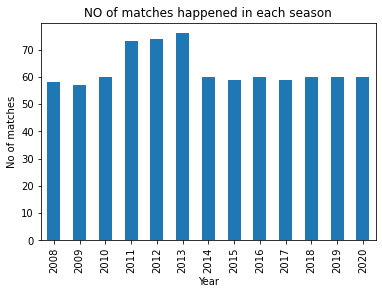

In [60]:
pd.DatetimeIndex(match["date"]).year.value_counts().sort_index().plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("No of matches")
plt.title("NO of matches happened in each season")
plt.show()

**2011-2013 have more matches being played than other seasons**

All other seasons have approximately 58-60 matches while 2011-2013 have more than 70 matches.

# How many team participated in each season

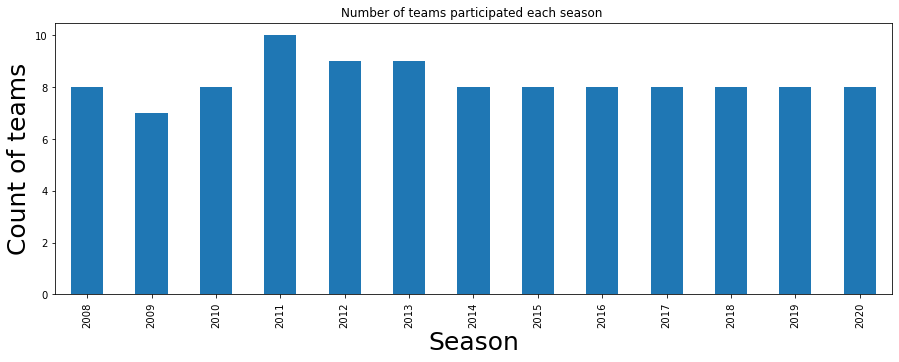

In [77]:
match.groupby(pd.DatetimeIndex(match["date"]).year)['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of teams participated each season ")
plt.ylabel("Count of teams", size = 25)
plt.xlabel("Season", size = 25)
plt.show()

**10 teams played in 2011 and 9 teams each in 2012 and 2013**

This explains why 2011-2013 have seen more matches being played than other seasons

#  How many matches plaed in each city?

[]

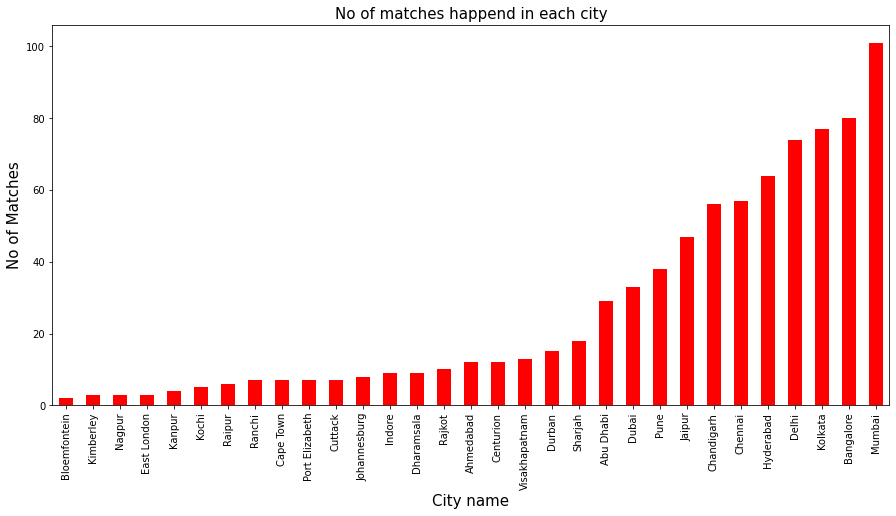

In [61]:

match.city.value_counts().sort_values(ascending=True).plot(kind="bar",color="red",figsize=(15,7))
plt.xlabel("City name",size=15)
plt.ylabel("No of Matches",size=15)
plt.title("No of matches happend in each city",size=15)
plt.plot()

Most of the matches was played in **Mumbai,Bangalore,Kolkata,Delhi,Chennai**

# How many matches plaed in each venue?

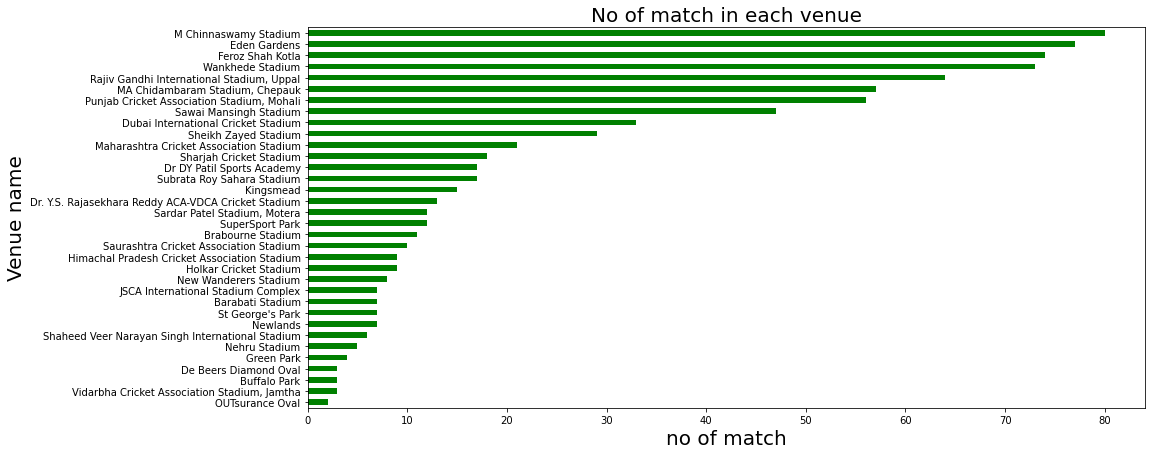

In [65]:
match.venue.value_counts().sort_values(ascending=True).plot(kind="barh",color="green",figsize=(15,7))
plt.xlabel("no of match",size=20)
plt.ylabel("Venue name",size=20)
plt.title("No of match in each venue",size=20)
plt.show()

# Top 10 players with most man of the match

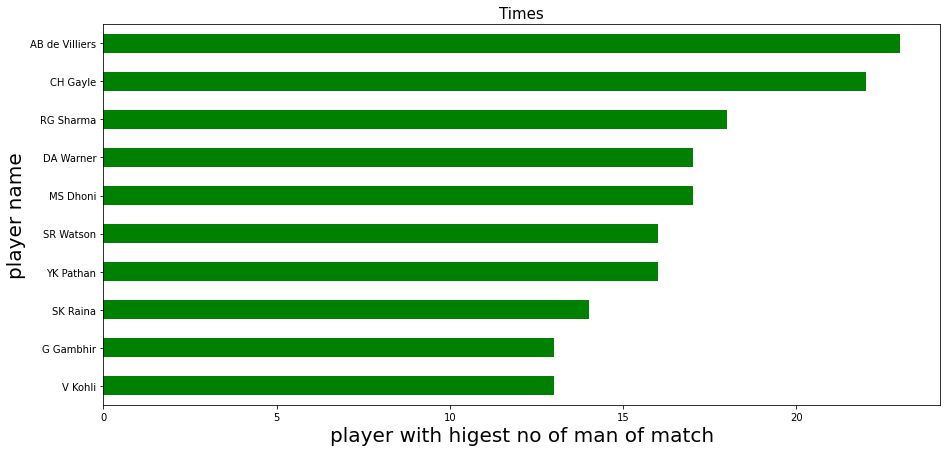

In [45]:
match.player_of_match.value_counts().sort_values().tail(10).plot(kind="barh",color="green",figsize=(15,7))
plt.xlabel("player with higest no of man of match",size=20)
plt.ylabel("player name",size=20)
plt.title("Times",size=15)
plt.show()

**AB de villiers and Chris Gayle has won most man of the match**

# Do teams bat first or second after winning toss?

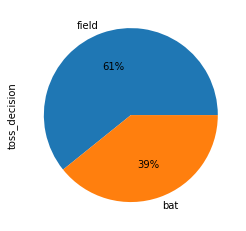

In [78]:
match["toss_decision"].value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.show()

**Most of the team has prefered to bowl first**

# Do team win by batting first or bowling first?

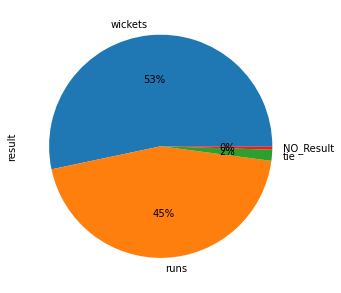

In [80]:
match["result"].value_counts().plot(kind="pie",autopct='%1.0f%%',figsize=(5,15))
plt.show()

**Team who bowled first has won most of the time**

# Bivarient/Multivarient Analysis

# Which team has dominated ipl so far?

In [81]:
def no_of_matchs():
    no_of_match=pd.Series([0]*(len(match.team1.unique())),index=match.team1.unique())
    for i in no_of_match.index:
        no_of_match[i]+=len(match[match["team1"]==i])
        no_of_match[i]+=len(match[match["team2"]==i])
    return no_of_match

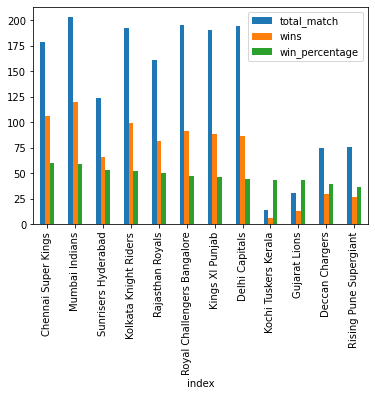

In [83]:
d=match[match["winner"]!="NO_Result"].groupby("winner")["winner"].count().sort_values(ascending=False)
d.name="wins"
no_of_match=no_of_matchs()
no_of_match.name="total_match"
combined=pd.merge(no_of_match,d, right_index=True, left_index=True).reset_index()
combined.set_index("index",inplace=True)
combined["win_percentage"]=round(combined["wins"]/combined["total_match"]*100)
combined.sort_values(by="win_percentage",ascending=False).plot(kind="bar")
plt.show()

# Which team has higest winning perccentage?

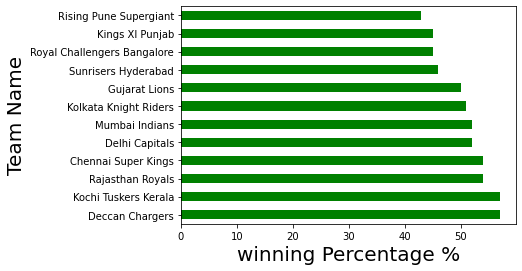

In [84]:
toss_winner=match.groupby("toss_winner")["toss_winner"].count().sort_values(ascending=False)
toss_winner.name="toss_win"
no_of_match=no_of_matchs()
no_of_match.name="total_match"
combined=pd.merge(no_of_match,toss_winner,left_index=True,right_index=True)
combined["win_percentage"]=round(combined["toss_win"]/combined["total_match"]*100)
combined["win_percentage"].sort_values(ascending=False).plot(kind="barh",color="green")
plt.ylabel("Team Name",size=20)
plt.xlabel("winning Percentage %",size=20)
plt.show()

**Chennai and Kochi are the two team with verry high winning percentage**

# Which team has more chance of winning match by winning toss?

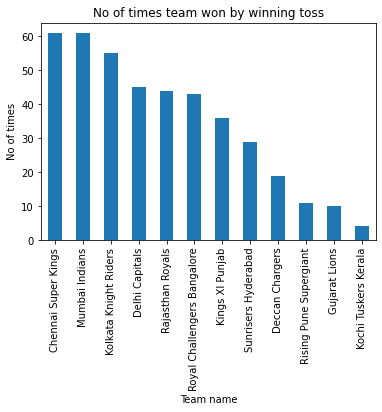

In [94]:
match[match["toss_winner"]==match["winner"]].groupby("winner")["winner"].count().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Team name")
plt.ylabel("No of times")
plt.title("No of times team won by winning toss")
plt.show()

**Chennai,Mumbai,Kolkata has more chance of wiining the match by winning the toss**

# Top 10 Batsman

In [61]:
runs=ball[ball["extras_type"]=="Correct Ball"].groupby(["batsman"])["total_runs"].sum().reset_index()
runs.set_index("batsman",inplace=True)
runs.sort_values(by="total_runs",ascending=False).head(10)

,total_runs
batsman,
V Kohli,5863
SK Raina,5345
DA Warner,5224
RG Sharma,5200
S Dhawan,5170
AB de Villiers,4816
CH Gayle,4731
MS Dhoni,4611
RV Uthappa,4595


# Top 10 bowlers who has bowled maximum extras

array([<AxesSubplot:ylabel='extras_type'>], dtype=object)

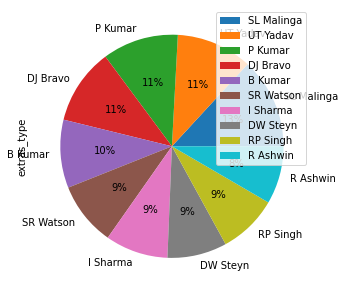

In [62]:
runs=ball[ball["extras_type"]!="Correct Ball"].groupby(["bowler"])["extras_type"].count().reset_index()
runs.set_index("bowler",inplace=True)
runs.sort_values(by="extras_type",ascending=False).head(10).plot(kind="pie",subplots=True,autopct='%1.0f%%',figsize=(5,15))

# Top 10 Bolwers

In [63]:
wicket=ball[ball.dismissal_kind.str.contains("caught|bowled|lbw|hit wicket|caught and bowled")].groupby("bowler")["player_dismissed"].count().reset_index()
wicket.set_index("bowler",inplace=True)
wicket.rename(columns={'player_dismissed':"NO_of_wickets"},inplace=True)
wicket.sort_values(by="NO_of_wickets",ascending=False).head(10)

,NO_of_wickets
bowler,
SL Malinga,170
DJ Bravo,153
PP Chawla,140
B Kumar,135
A Mishra,133
Harbhajan Singh,132
R Ashwin,130
UT Yadav,119
SP Narine,117


# Percentage of runs scored based on each over

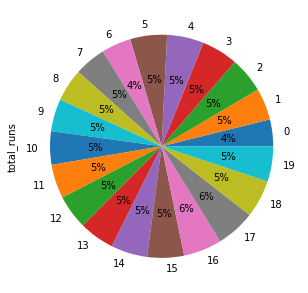

In [95]:
ball.groupby("over")["total_runs"].sum().plot(kind="pie",autopct='%1.0f%%',figsize=(5,15))
plt.show()

**High run scoring overs are 16th and 17th over**

# Percentage of wickets falling  based on each over

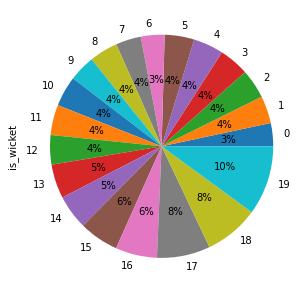

In [96]:
ball.groupby("over")["is_wicket"].sum().plot(kind="pie",autopct='%1.0f%%',figsize=(5,15))
plt.show()

**More no of wicket was fallen on 19th over followed by 18th and 17th**